In [162]:
import os
import pandas as pd
#import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns 

#import warnings; warnings.simplefilter('ignore')

In [163]:
%matplotlib notebook

# Data loading

In [164]:
allData_hr = pd.read_csv('/Users/aco/SourceTree/ActivityRecognition_vs_Privacy/highresparetoresults.csv')
allData_lr = pd.read_csv('/Users/aco/SourceTree/ActivityRecognition_vs_Privacy/lowresparetoresults.csv')

allData_hr_d=allData_hr[allData_hr['P1front'] == 0]
allData_hr_pf=allData_hr[allData_hr['P1front'] == 1]

allData_lr_d=allData_lr[allData_lr['P1front'] == 0]
allData_lr_pf=allData_lr[allData_lr['P1front'] == 1]


In [165]:
allData_hr_d_red = allData_hr_d[['eps', 'delta', 'maxRMSEpct','minMCC',]].astype(float)
allData_hr_pf_red = allData_hr_pf[['eps', 'delta', 'maxRMSEpct','minMCC',]].astype(float)

allData_lr_d_red = allData_lr_d[['eps', 'delta', 'maxRMSEpct','MCC',]].astype(float)
allData_lr_pf_red = allData_lr_pf[['eps', 'delta', 'maxRMSEpct','MCC',]].astype(float)

# Plotting Pareto front 

<IPython.core.display.Javascript object>


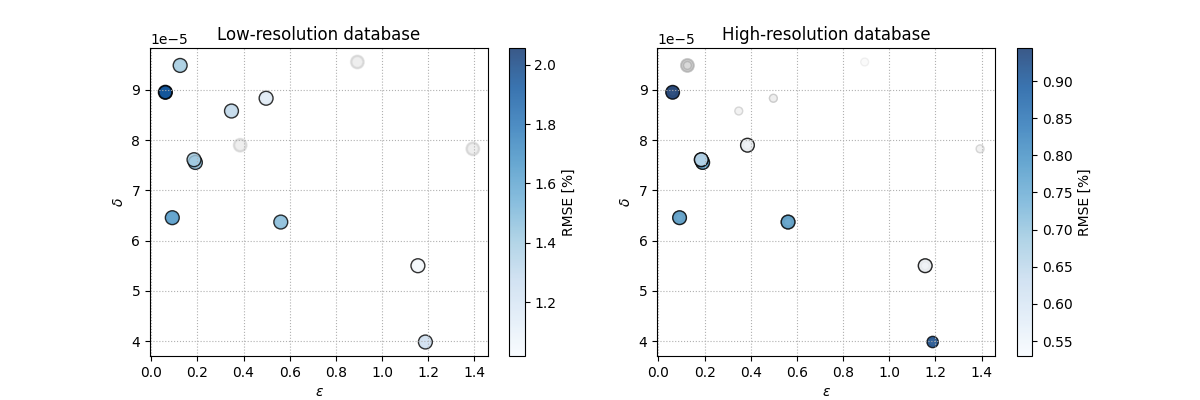

In [166]:
fig, axs = plt.subplots(1,2,figsize = (12,4))

# Plotting Pareto front for low-resolution data
axs[0].scatter(allData_lr_d_red.eps, allData_lr_d_red.delta, s=allData_lr_d_red.MCC*100, c='lightgray', alpha=0.1, edgecolors='gray')
pcm_lr=axs[0].scatter(allData_lr_pf_red.eps, allData_lr_pf_red.delta, s=allData_lr_pf_red.MCC*100, c=allData_lr_pf_red.maxRMSEpct, cmap='Blues', alpha=0.8, edgecolors='black')
axs[0].set_title('Low-resolution database')
axs[0].set_xlabel('$\epsilon$')
axs[0].set_ylabel('$\delta$')
axs[0].grid(True)

# Plotting Pareto front for high-resolution data
axs[1].scatter(allData_hr_d_red.eps, allData_hr_d_red.delta, s=allData_hr_d_red.minMCC*100, c='lightgray', alpha=0.1, edgecolors='gray')
pcm_hr=axs[1].scatter(allData_hr_pf_red.eps, allData_hr_pf_red.delta, s=allData_hr_pf_red.minMCC*100, c=allData_hr_pf_red.maxRMSEpct, cmap='Blues', alpha=0.8, edgecolors='black')
axs[1].set_title('High-resolution database')
axs[1].set_xlabel('$\epsilon$')
axs[1].set_ylabel('$\delta$')
axs[1].grid(True)

fig.colorbar(pcm_lr,ax=axs[0], label='RMSE [%]')
fig.colorbar(pcm_hr,ax=axs[1], label='RMSE [%]')

fig.savefig('Pareto.pdf')
